In [1]:
import yfinance as yf
import numpy as np

from src.backtest_engine import BacktestEngine
from src.signals import Signals


In [2]:
def load_market_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    data_flat = data.droplevel(1, axis=1)
    data_flat.name = symbol
    return data_flat

In [9]:
data = load_market_data('SPY', '2000-1-1', '2025-9-1')
data


C:\Users\olive\AppData\Local\Temp\ipykernel_16724\1156998524.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,91.887779,93.664724,90.900588,93.664724,8164300
2000-01-04,88.294388,91.019036,88.225284,90.683391,8089800
2000-01-05,88.452347,89.419794,86.714890,88.412859,12177900
2000-01-06,87.030800,89.400059,87.030800,88.215430,6227200
2000-01-07,92.085182,92.085182,88.491807,88.649757,8066500
...,...,...,...,...,...
2025-08-25,640.693665,643.505875,640.574001,642.259331,51274300
2025-08-26,643.376282,643.725351,639.796241,640.424504,51581600
2025-08-27,644.842224,645.580168,642.638312,642.787922,48341100


In [10]:
signal_configs = [
    {
        "name": "atr_strategy",
        "params": {
            "atr_period": 5,
            "atr_support_multiplier": 2.5,
            "n_day_high": 5
        }
    }
]


In [11]:
engine = BacktestEngine(
    data=data,
    start_value=100000,
    signal_configs=signal_configs
)


In [12]:
engine.run_backtest()

Building signals...


In [13]:
first = data.iloc[0]['Close']
last  = data.iloc[-1]['Close']

(last-first)/first*100


np.float64(600.0567506496019)

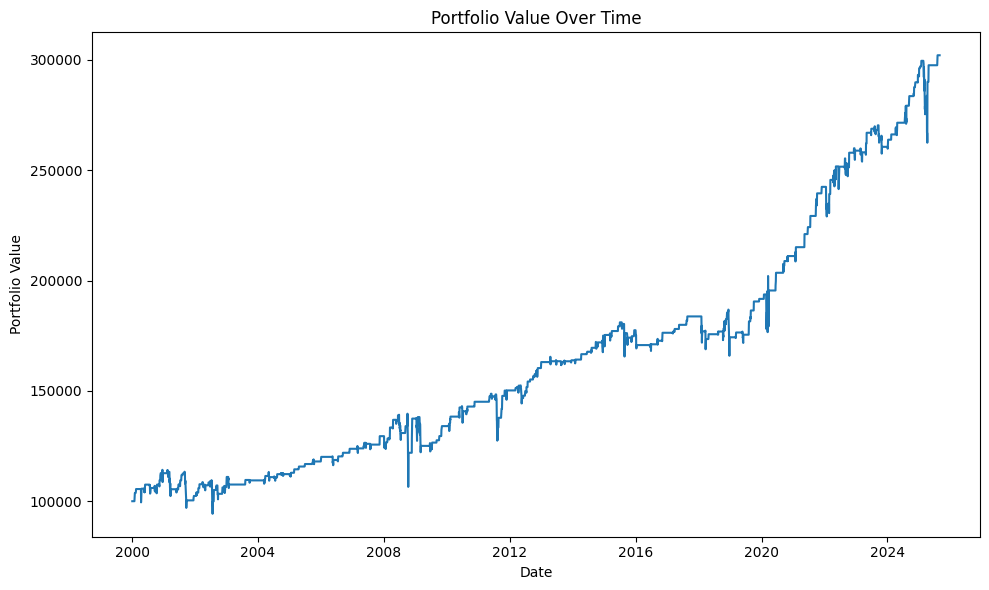

ValueError: operands could not be broadcast together with shapes (222,) (221,) 

In [ ]:

# Step 8: Evaluate Performance
final_portfolio_value = engine.get_portfolio_value(data.iloc[-1]['Close'])
initial_portfolio_value = 100000
returns = engine.get_portfolio_returns()
total_returns = (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value
annualized_returns = np.prod(1 + returns) ** (252 / len(data)) - 1  # Assuming 252 trading days in a year
volatility = np.std(returns) * np.sqrt(252)
sharpe_ratio = (annualized_returns - 0.02) / volatility  # Assuming risk-free rate of 2%
total_trades = len(engine.trades)/2

engine.plot_portfolio_value(plot_signals=False)

# Calculate and print performance metrics
total_pnl, average_trade_return, win_ratio = engine.calculate_performance()
print('--- Performance Metrics ---')
print(f'Total Returns: {total_returns:.2%}')
print(f'Annualized Returns: {annualized_returns:.2%}')
print(f'Volatility: {volatility:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Total P&L: {total_pnl:.2f}')
print(f'Average Trade Return: {average_trade_return:.2%}')
print(f'Win Ratio: {win_ratio:.2%}')
print(f'Total Trades: {total_trades}')



In [15]:
trades = engine.trades
trades

[{'symbol': 'SPY',
  'quantity': np.float64(1164.8752846155624),
  'price': np.float64(85.84609985351562)},
 {'symbol': 'SPY',
  'quantity': np.float64(-1164.8752846155624),
  'price': np.float64(89.04466247558594)},
 {'symbol': 'SPY',
  'quantity': np.float64(1183.773240789486),
  'price': np.float64(87.62313842773438)},
 {'symbol': 'SPY',
  'quantity': np.float64(-1183.773240789486),
  'price': np.float64(89.1335220336914)},
 {'symbol': 'SPY',
  'quantity': np.float64(1154.8092756703363),
  'price': np.float64(91.36909484863281)},
 {'symbol': 'SPY',
  'quantity': np.float64(-1154.8092756703363),
  'price': np.float64(91.50768280029297)},
 {'symbol': 'SPY',
  'quantity': np.float64(1191.1383091045782),
  'price': np.float64(88.71675109863281)},
 {'symbol': 'SPY',
  'quantity': np.float64(-1191.1383091045782),
  'price': np.float64(90.26066589355469)},
 {'symbol': 'SPY',
  'quantity': np.float64(1146.5996576014886),
  'price': np.float64(93.76676177978516)},
 {'symbol': 'SPY',
  'quant

In [21]:
print(sell_prices.shape)
print(buy_prices.shape)

(213,)
(214,)


In [25]:
# Calculate performance metrics based on executed trades
trade_prices = np.array([trade['price'] for trade in trades])
trade_quantities = np.array([trade['quantity'] for trade in trades])

buy_mask = trade_quantities > 0
sell_mask = trade_quantities < 0

buy_prices = trade_prices[buy_mask]
sell_prices = trade_prices[sell_mask]

min_trades = min(len(buy_prices), len(sell_prices))
buy_prices = buy_prices[:min_trades]
sell_prices = sell_prices[:min_trades]

trade_returns = (sell_prices - buy_prices) / buy_prices

trade_quantities = trade_quantities[trade_quantities > 0]

trade_pnl = trade_returns * trade_quantities[:-1]

total_pnl = np.sum(trade_pnl)
average_trade_return = np.mean(trade_returns)
win_ratio = np.sum(trade_pnl > 0) / len(trade_pnl)

print("Total P&L: ", total_pnl)
print("Average Trade Return: ", average_trade_return)
print("Win Ratio: ", win_ratio)


Total P&L:  1176.0589560722028
Average Trade Return:  0.005352191309441486
Win Ratio:  0.755868544600939


In [17]:
trade_prices

array([ 85.84609985,  89.04466248,  87.62313843,  89.13352203,
        91.36909485,  91.5076828 ,  88.7167511 ,  90.26066589,
        93.76676178,  92.43742371,  92.07290649,  92.29176331,
        86.90142059,  87.95560455,  86.96108246,  88.55229187,
        84.10680389,  86.58315277,  83.61656952,  83.59664154,
        84.17284393,  85.13692474,  81.97020721,  81.47860718,
        78.75881195,  73.28620148,  81.35229492,  81.51873779,
        78.10025787,  79.49079132,  76.42848206,  77.80234528,
        75.62602234,  77.26309967,  76.09469604,  76.5825882 ,
        72.74991608,  64.89061737,  72.2109375 ,  73.65444183,
        73.85603333,  74.45737457,  72.95075989,  73.44219971,
        69.84701538,  71.18550873,  70.32555389,  71.50880432,
        73.67205048,  73.54230499,  70.98737335,  70.79932404,
        67.68019867,  68.48428345,  64.60487366,  64.70246887,
        59.94562149,  55.13018417,  54.51196671,  57.32967377,
        57.44677734,  58.56603241,  57.15398407,  55.13

In [18]:
trade_quantities

array([ 1164.87528462, -1164.87528462,  1183.77324079, -1183.77324079,
        1154.80927567, -1154.80927567,  1191.1383091 , -1191.1383091 ,
        1146.5996576 , -1146.5996576 ,  1151.13905281, -1151.13905281,
        1222.5421894 , -1222.5421894 ,  1236.52367611, -1236.52367611,
        1301.88047104, -1301.88047104,  1348.06912508, -1348.06912508,
        1338.8409629 , -1338.8409629 ,  1390.56379355, -1390.56379355,
        1438.58443625, -1438.58443625,  1295.94855238, -1295.94855238,
        1352.67274541, -1352.67274541,  1406.87115638, -1406.87115638,
        1447.35729955, -1447.35729955,  1469.58089204, -1469.58089204,
        1547.00258564, -1547.00258564,  1390.17656233, -1390.17656233,
        1386.38204813, -1386.38204813,  1415.01428659, -1415.01428659,
        1487.84828181, -1487.84828181,  1506.04198597, -1506.04198597,
        1461.81979432, -1461.81979432,  1514.43266713, -1514.43266713,
        1584.22716302, -1584.22716302,  1679.35723631, -1679.35723631,
      

In [19]:
trade_returns

array([ 3.72592654e-02, -1.59641691e-02,  1.72372690e-02,  2.50811677e-02,
        1.51679243e-03, -3.04994249e-02,  1.74027427e-02,  3.88441172e-02,
       -1.41770714e-02, -3.94339432e-03,  2.37699471e-03, -5.84054581e-02,
        1.21308024e-02, -1.13070918e-02,  1.82979485e-02, -5.02018399e-02,
        2.94429079e-02, -3.42628232e-02, -2.38325713e-04,  6.89265002e-03,
        1.14535849e-02, -3.71955827e-02, -5.99730138e-03, -3.33804826e-02,
       -6.94856910e-02,  1.10062922e-01,  2.04595176e-03, -4.19348976e-02,
        1.78044668e-02, -3.85240757e-02,  1.79758015e-02, -2.79724593e-02,
        2.16470109e-02, -1.51224016e-02,  6.41164465e-03, -5.00462600e-02,
       -1.08031722e-01,  1.12810148e-01,  1.99901065e-02,  2.73699028e-03,
        8.14207344e-03, -2.02345932e-02,  6.73659630e-03, -4.89525687e-02,
        1.91632146e-02, -1.20804761e-02,  1.68253268e-02,  3.02514659e-02,
       -1.76112220e-03, -3.47409786e-02, -2.64905303e-03, -4.40558636e-02,
        1.18806504e-02, -